# Task 5. Matrix multiplication (matmul)

* Launch all cells of the task, write down (in this markdown) the time ratio (according to cProfile results) between computational times (expended on matmuls based on loops and numpy) explain why cProfile gives faster the same results for numpy code than for loop code.

## Import libraries

In [1]:
import cProfile
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [55]:
def matmul(A, B):    
    C = [[0 for row in range(len(A))] for col in range(len(B[0]))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                C[i][j] += A[i][k]*B[k][j]
    return C


def prepare_A_B(n, m):
    A = np.arange(n * m).reshape(n, m)
    B = 0.1 * A[::-1].T
    return A, B


def repeat_loops(m = 100):
    for n in range(10, 50):
        A, B = prepare_A_B(n, m)
        matmul(A, B)

        
def repat_numpy(m = 100):    
    for n in range(10, 50):
        A, B = prepare_A_B(n, m)
        np.dot(A, B)

In [56]:
m_given = 100

cProfile.run('repeat_loops(m = ' + str(m_given) + ')' )

         164 function calls in 0.006 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.006    0.006 <ipython-input-55-6250c50a3bad>:21(repat_numpy)
       40    0.002    0.000    0.003    0.000 <ipython-input-55-6250c50a3bad>:9(prepare_A_B)
        1    0.000    0.000    0.006    0.006 <string>:1(<module>)
        1    0.000    0.000    0.006    0.006 {built-in method builtins.exec}
       40    0.001    0.000    0.001    0.000 {built-in method numpy.core.multiarray.arange}
       40    0.003    0.000    0.003    0.000 {built-in method numpy.core.multiarray.dot}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
       40    0.000    0.000    0.000    0.000 {method 'reshape' of 'numpy.ndarray' objects}




In [57]:
cProfile.run('repeat_loops(m = ' + str(m_given) + ')' )

         43924 function calls in 6.384 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       40    6.380    0.159    6.383    0.160 <ipython-input-55-6250c50a3bad>:1(matmul)
        1    0.000    0.000    6.384    6.384 <ipython-input-55-6250c50a3bad>:15(repeat_loops)
     1180    0.001    0.000    0.001    0.000 <ipython-input-55-6250c50a3bad>:2(<listcomp>)
       40    0.001    0.000    0.001    0.000 <ipython-input-55-6250c50a3bad>:9(prepare_A_B)
        1    0.000    0.000    6.384    6.384 <string>:1(<module>)
        1    0.000    0.000    6.384    6.384 {built-in method builtins.exec}
    42580    0.002    0.000    0.002    0.000 {built-in method builtins.len}
       40    0.000    0.000    0.000    0.000 {built-in method numpy.core.multiarray.arange}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
       40    0.000    0.000    0.000    0.000 {method 'reshape' of 'nump

# Task 6 Advanced specgram

## Run assistive plot functions

In [2]:
def my_plot(x, y, title, xlabel, ylabel, fig_x_size = 15, fig_y_size = 10, font_param = 20):
    plt.figure(figsize=(fig_x_size, fig_y_size))
    plt.plot(x, y, "g.--")    
    plt.title(title, fontsize = font_param * 1.3)
    plt.xlabel(xlabel, fontsize = font_param)
    plt.ylabel(ylabel, fontsize = font_param)
    plt.xticks(fontsize = font_param)
    plt.yticks(fontsize = font_param)

In [3]:
def my_imshow(x, y, z, 
              title, 
              xlabel, 
              ylabel,
              grid_active = False, fig_x_size = 15, fig_y_size = 10, font_param = 20):
    
    plt.figure(figsize=(fig_x_size, fig_y_size))
    plt.imshow(z, aspect='auto', 
               origin='lower', 
               extent=[min(x)/2/pi, max(x)/2/pi, y[0], 2 * w[int(len(x)/2)-1]])
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=font_param)
    plt.title(title, fontsize = font_param * 1.3)
    plt.xlabel(xlabel, fontsize = font_param)
    plt.ylabel(ylabel, fontsize = font_param)
    plt.xticks(fontsize = font_param)
    plt.yticks(fontsize = font_param)
    plt.grid(grid_active)

## Generate the signal
* E.g., signal consits of wave packets of three harmonic signals

In [26]:
def form_signal(n_timestamps = 4096):
    t=np.linspace(-20*2*pi, 20*2*pi, n_timestamps)
    y=np.sin(t)*exp(-t**2/2/20**2)               #generate first  wave packets of harmonic signal
    y=y+np.sin(3*t)*exp(-(t-5*2*pi)**2/2/20**2)  #add      second wave packets of harmonic signal
    y=y+np.sin(5*t)*exp(-(t-10*2*pi)**2/2/10**2) #add      third  wave packets of harmonic signal
    return t, y

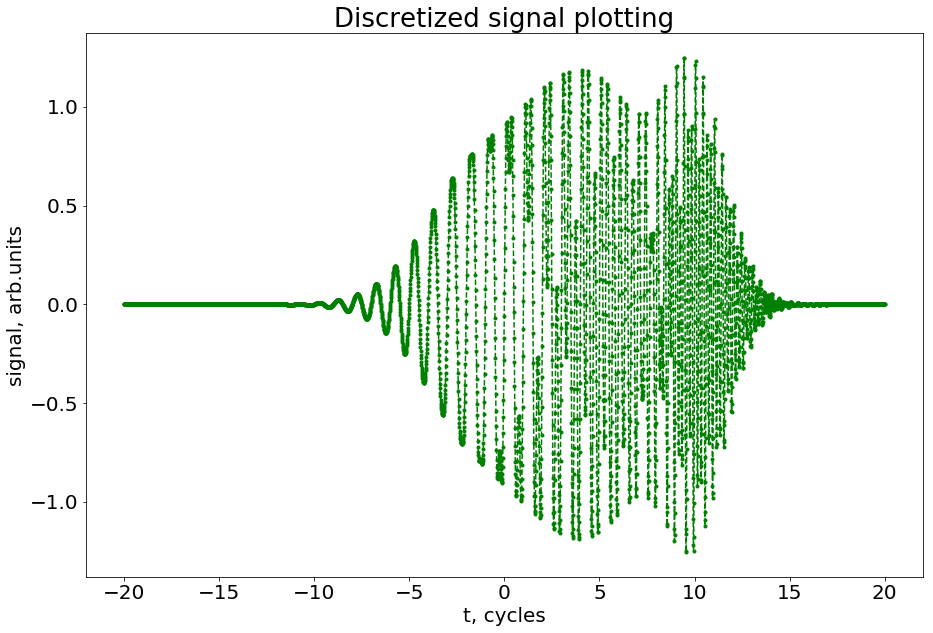

In [5]:
my_plot(t / 2 / pi, y, title = "Discretized signal plotting", xlabel = 't, cycles', ylabel = 'signal, arb.units')
plt.show()

## Amplitude-Frequency Power (AFP) characteristic

* <b> AFP </b> provides us with information about <strong>amplitudes </strong> of separated <strong> harmonic </strong> signals (spectral analysis) 
* <b> AFP </b> does <strong>not </strong> give information about the frequency and amplitude depence <strong> on time </strong>.

### Explain, why the "hats" of signal and AFP may be sharp

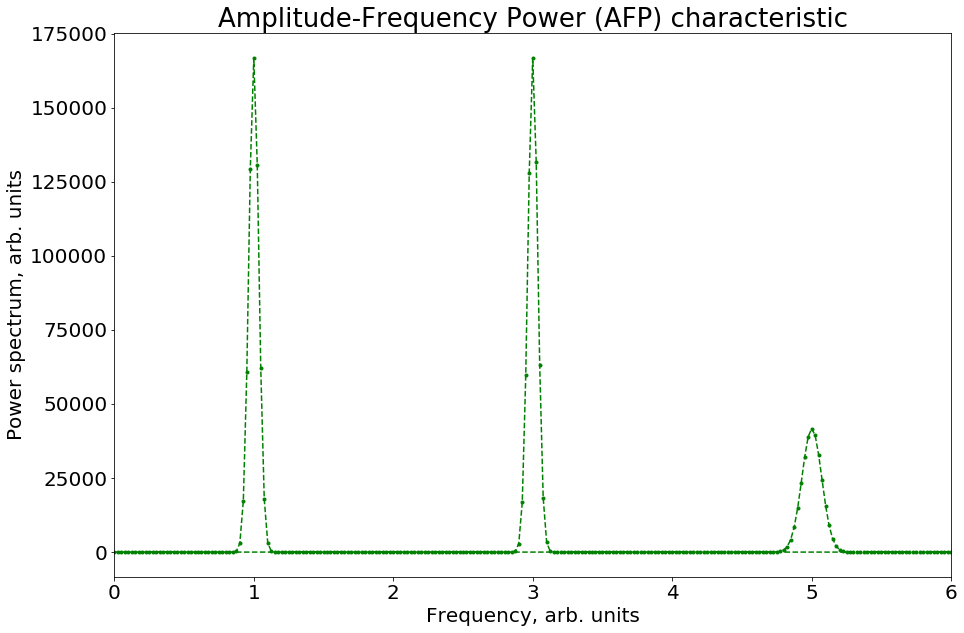

In [25]:
# Fourier spectrum
sp=fft.fft(y)
w=fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
# plot(w, abs(sp)**2)

my_plot(w, abs(sp)**2, title = "Amplitude-Frequency Power (AFP) characteristic", xlabel = 'Frequency, arb. units', ylabel = 'Power spectrum, arb. units')
plt.xlim(0, 6)
plt.show()

## Applicate short-time Fourier transform (STFT)
* <b> STFT </b> provides us with information about the frequency and amplitude depence <strong> on time </strong> (specgram).
* vary $\operatorname{kappa} = \overline{0.1, \,10}$, write down results into gif (add in title of picture values of kappa), and explain, why specgram is different.

In [14]:
def window_function(t, window_position, window_width):
    return exp(- (t - window_position) ** 2 / 2 / window_width ** 2)


def get_specgram(window_width, nwindowsteps = 1000):
    t_window_positions=linspace(-20 * 2 * pi, 20 * 2 * pi, nwindowsteps)

    specgram = np.empty([len(t), len(t_window_positions)])

    for i,t_window_position in enumerate(t_window_positions):
        y_window=y * window_function(t, t_window_position, window_width)
        #plot(y_window)
        specgram[:,i]=abs(fft.fft(y_window))

    return specgram


def repeat_function(window_width, nwindowsteps = 1000, repetitions = 100):
    for _ in range(repetitions):
        get_specgram(window_width = window_width, 
                     nwindowsteps = nwindowsteps)

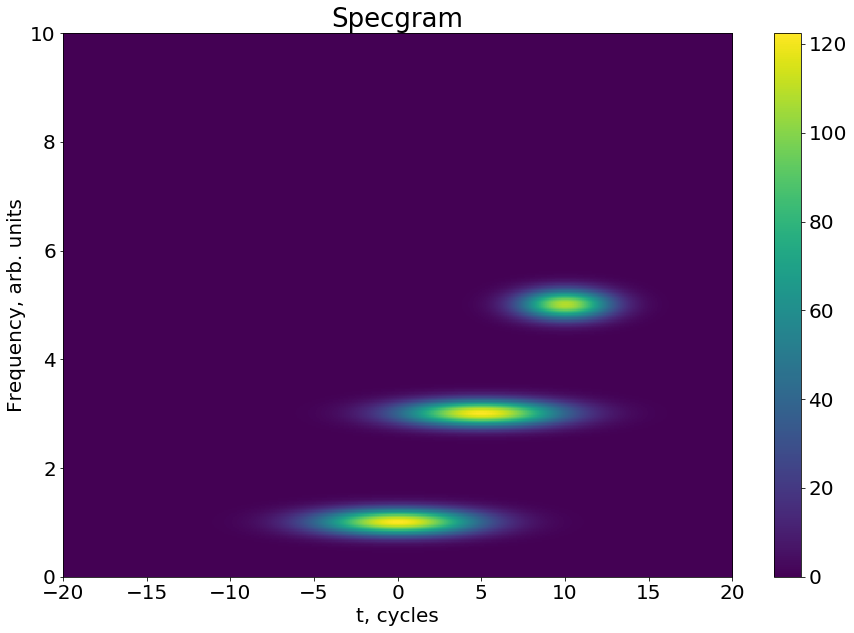

In [24]:
kappa = 1
window_width_given = kappa * 2 * pi
nwindowsteps_given = 1000

my_imshow(t, w, get_specgram(window_width = window_width_given,
                             nwindowsteps = nwindowsteps_given), 
          title = "Specgram", 
          xlabel = "t, cycles", 
          ylabel = "Frequency, arb. units")
# clim(0,0.5)
plt.ylim(0, 10)
plt.show()

## cProfile the code

* Vary $\operatorname{n\_timestamps\_given} = \overline{4090, \, 5000}$, write down results in this markdown and explain why cProfiler gives different results. What is bottleneck in this program? How can you improve the program?

In [ ]:
window_width_given = 1 * 2 * pi
nwindowsteps_given = 1000
repetitions_given = 100

n_timestamps_given = 4096

t, y = form_signal(n_timestamps = n_timestamps_given)

In [27]:
cProfile.run('repeat_function(   window_width = ' + str(window_width_given) + ',' +
                                'nwindowsteps = ' + str(nwindowsteps_given) + ',' +
                                'repetitions  = ' + str(repetitions_given ) +       ')' )

         501604 function calls in 12.434 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   100000    6.093    0.000    6.093    0.000 <ipython-input-14-5c5c0547a085>:1(window_function)
        1    0.000    0.000   12.434   12.434 <ipython-input-14-5c5c0547a085>:18(repeat_function)
      100    1.939    0.019   12.434    0.124 <ipython-input-14-5c5c0547a085>:5(get_specgram)
        1    0.000    0.000   12.434   12.434 <string>:1(<module>)
   100000    0.015    0.000    0.015    0.000 _numpy_fft.py:66(_unitary)
   100000    0.050    0.000    0.959    0.000 _numpy_fft.py:73(fft)
      100    0.000    0.000    0.000    0.000 function_base.py:13(_index_deprecate)
      100    0.002    0.000    0.004    0.000 function_base.py:25(linspace)
      100    0.000    0.000    0.000    0.000 numeric.py:1927(isscalar)
      200    0.000    0.000    0.001    0.000 numeric.py:504(asanyarray)
      100    0.000    0.000    0.000    0.000 

## cProfile parts of code
### * Wrap the following markdowns as $\mathbf{def}\:\:\: \mathit{plot\_specgram(\dots)}\:\:\: \:\:\: $ and as $\:\:\: \:\:\: \mathbf{def}\:\:\: \mathit{compute\_specgram(\dots)}$: ![Image_1.png](Image_1.png) 
![Image_3.png](Image_3.png)

### * Use, for example, $\mathit{time()}$ for your own profiling, by using, e.g., $\mathit{from\: time\: import\: time}$.
### * Vary $\operatorname{n\_timestamps\_given}$ and (by using, e.g., $\mathit{time()}$) calulate computational time expended on $\mathit{plot\_specgram(\dots)}$ ($=t_{plot}(nwindowsteps\_given)$) and $\mathit{compute\_specgram(\dots)}$ ($=t_{compute}(nwindowsteps\_given)$) and ratios $\frac{t_{plot}(nwindowsteps\_given)}{t_{total}(n\_timestamps\_given)}$ $\frac{t_{compute}(nwindowsteps\_given)}{t_{total}(nwindowsteps\_given)}$, where $t_{total}(nwindowsteps\_given)$ is total computational time of program in for each $n\_timestamps\_given$
### * Plot the graphs of the ratios versus $\mathit{nwindowsteps\_given}$, label axises and title.